In [3]:
from gensim.models import Word2Vec
model = Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [188]:
model.most_similar(positive=['woman', 'father'], negative=['man'])

[('mother', 0.8462507128715515),
 ('daughter', 0.7899606227874756),
 ('husband', 0.7560455799102783),
 ('son', 0.7279756665229797),
 ('eldest_daughter', 0.7120418548583984),
 ('niece', 0.7096832990646362),
 ('aunt', 0.6960804462432861),
 ('grandmother', 0.6897341012954712),
 ('sister', 0.6895190477371216),
 ('daughters', 0.6731119751930237)]

In [10]:
model.doesnt_match("pizza hamburger lamp lamb sushi".split())

'lamp'

In [9]:
model.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])

0.61540462391492834

In [12]:
model.most_similar(positive=['pizza', 'nutella'], negative=['tomato'])

[('pizzas', 0.5764024257659912),
 ('chili_fries', 0.5731587409973145),
 ('nachos', 0.5663036108016968),
 ('chicken_parm', 0.5654000639915466),
 ('pepperoni_pizza', 0.5621824264526367),
 ('donuts', 0.5608795881271362),
 ('tater_tots', 0.5588851571083069),
 ('Thin_crust', 0.5585115551948547),
 ('cheesecake_brownies', 0.5561680793762207),
 ('sandwiches', 0.555450439453125)]

In [18]:
model.vocab['man']

In [21]:
model.doesnt_match("cheese onion nutella ham bacon tree".split())

'tree'

In [24]:
model.doesnt_match("one three five ten milion".split())

'milion'

In [46]:
model.most_similar(positive=['roof', 'car'], negative=['house'])

[('windshield', 0.521588921546936),
 ('wiper_blade', 0.5010256767272949),
 ('hood', 0.4929332733154297),
 ('Car', 0.4909749925136566),
 ('roofs', 0.48564305901527405),
 ('Jeep', 0.4798518419265747),
 ('dented_fender', 0.47638189792633057),
 ('aerodynamically_styled', 0.47627532482147217),
 ('vehicle', 0.4761223793029785),
 ('windscreen', 0.47515594959259033)]

In [45]:
model.most_similar('anaconda')

[('snake', 0.5355017781257629),
 ('boa_constrictor', 0.5330097675323486),
 ('python', 0.5207394361495972),
 ('lizard', 0.5105888843536377),
 ('rat_snake', 0.4946209788322449),
 ('green_anaconda', 0.49421364068984985),
 ('tarantula', 0.4912654459476471),
 ('Burmese_python', 0.48795682191848755),
 ('iguana', 0.4875754117965698),
 ('cobra', 0.4809567332267761)]

In [33]:
type(model)

gensim.models.word2vec.Word2Vec

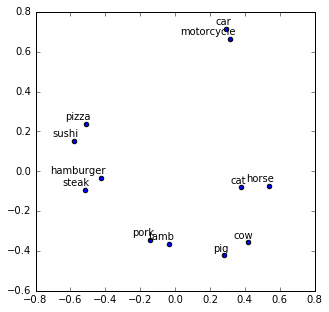

In [143]:
from matplotlib import pylab
from sklearn.decomposition import PCA

def plot(words):
  %matplotlib inline
  embeddings = [model[w] for w in words]
    
  pca = PCA(n_components=2)  
  two_d_embeddings = pca.fit_transform(embeddings)
   
  pylab.figure(figsize=(5,5))  # in inches
  for i, label in enumerate(words):
    x, y = two_d_embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
  pylab.show()

plot("pizza hamburger steak car motorcycle lamb cat cow sushi horse pork pig".split())


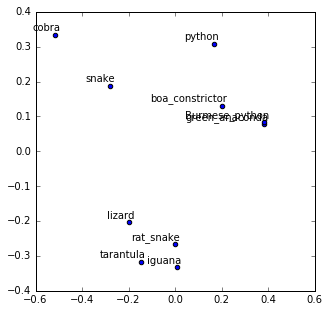

In [70]:
plot([w[0] for w in model.most_similar('anaconda')])

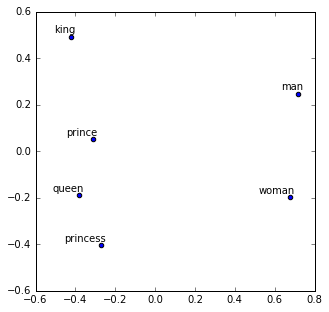

In [128]:
plot("king queen man woman prince princess".split())

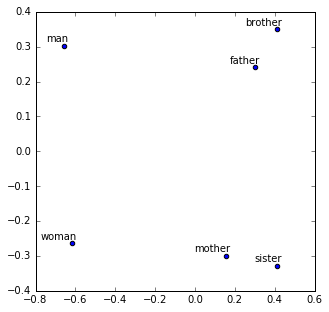

In [186]:
plot("man woman mother father sister brother".split())

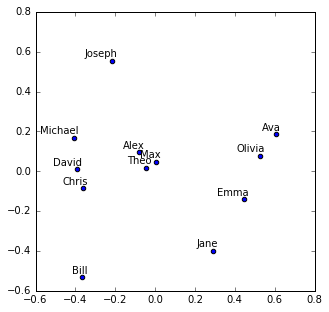

In [183]:
plot("Joseph David Michael Jane Olivia Emma Ava Bill Alex Chris Max Theo".split())

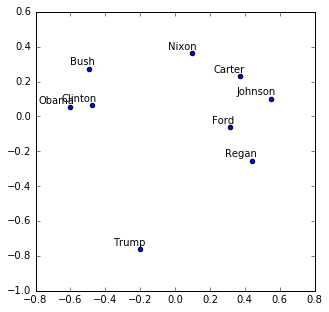

In [142]:
plot("Clinton Bush Trump Carter Obama Regan Ford Nixon Johnson".split())

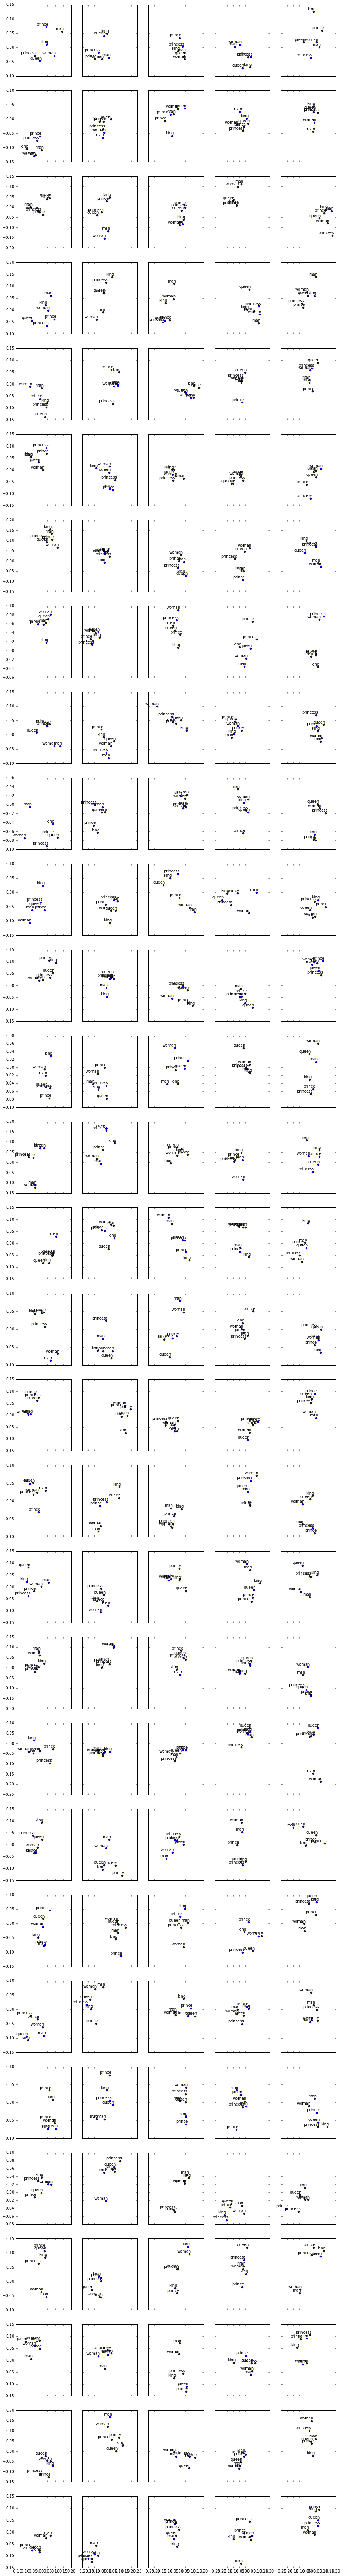

In [171]:
from matplotlib import pylab
from sklearn.decomposition import PCA

def plotAll(words):
  """Plots all axes"""
  %matplotlib inline
  embeddings = [model[w] for w in words]
    
  columns = 5
  features = 300
  rows = (features // columns) // 2
  fig, axarr = pylab.subplots(rows, columns, sharex='col', sharey='row')
  fig.set_size_inches(15, 120) 
  for f in range(0, features, 2):  
      for i, label in enumerate(words):
        x = embeddings[i][f]
        y = embeddings[i][f + 1]
        sbplt = axarr[(f // 2) // columns][(f // 2) % columns ]
        sbplt.scatter(x, y)
        sbplt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
  pylab.show()

plotAll("king queen man woman prince princess".split())


In [155]:
 print(axarr.shape)

NameError: name 'axarr' is not defined